# Fraud Detection for Automobile Claims: Data Exploration

## Background

This notebook is the first part of a series of notebooks that will demonstrate how to prepare, train, and deploy a model that detects fradulent autoclaims. In this notebook, we will focusing on data exploration. You can choose to run this notebook by itself or in sequence with the other notebooks listed below. Please see the [README.md](README.md) for more information about this use case implemented by this series of notebooks. 


1. **[Fraud Detection for Automobile Claims: Data Exploration](./0-AutoClaimFraudDetection.ipynb)**
1. [Fraud Detection for Automobile Claims: Data Preparation, Process, and Store Features](./1-data-prep-e2e.ipynb)
1. [Fraud Detection for Automobile Claims: Train, Check Bias, Tune, Record Lineage, and Register a Model](./2-lineage-train-assess-bias-tune-registry-e2e.ipynb)
1. [Fraud Detection for Automobile Claims: Mitigate Bias, Train, Register, and Deploy Unbiased Model](./3-mitigate-bias-train-model2-registry-e2e.ipynb)


## Datasets and Exploratory Visualizations

The dataset is synthetically generated and consists of customers and claims datasets.
Here we will load them and do some exploratory visualizations.

In [1]:
!pip install seaborn==0.11.1

In [2]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns  # visualisation
import matplotlib.pyplot as plt  # visualisation

%matplotlib inline
sns.set(color_codes=True)

df_claims = pd.read_csv("./data/claims_preprocessed.csv", index_col=0)
df_customers = pd.read_csv("./data/customers_preprocessed.csv", index_col=0)

In [3]:
print(df_claims.isnull().sum().sum())
print(df_customers.isnull().sum().sum())

0
0


This should return no null values in both of the datasets.

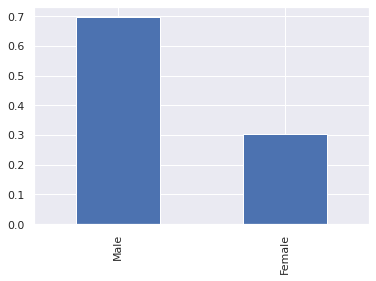

In [4]:
# plot the bar graph customer gender
df_customers.customer_gender_female.value_counts(normalize=True).plot.bar()
plt.xticks([0, 1], ["Male", "Female"]);

The dataset is heavily weighted towards male customers.

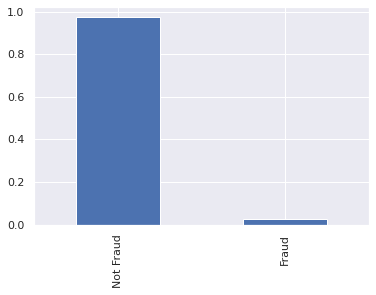

In [5]:
# plot the bar graph of fraudulent claims
df_claims.fraud.value_counts(normalize=True).plot.bar()
plt.xticks([0, 1], ["Not Fraud", "Fraud"]);

The overwhemling majority of claims are legitimate (i.e. not fraudulent).

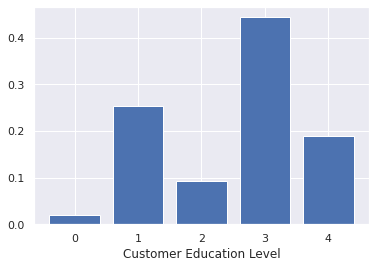

In [6]:
# plot the education categories
educ = df_customers.customer_education.value_counts(normalize=True, sort=False)
plt.bar(educ.index, educ.values)
plt.xlabel("Customer Education Level");

Text(0.5, 0, 'Total Claim Amount')

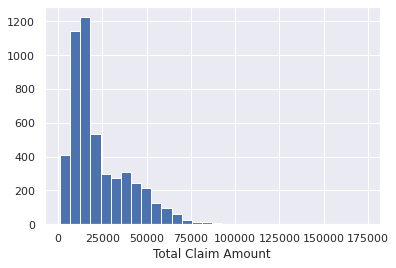

In [7]:
# plot the total claim amounts
plt.hist(df_claims.total_claim_amount, bins=30)
plt.xlabel("Total Claim Amount")

Majority of the total claim amounts are under $25,000.

Text(0.5, 0, 'Number of claims per year')

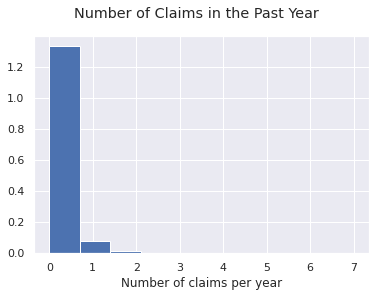

In [8]:
# plot the number of claims filed in the past year
df_customers.num_claims_past_year.hist(density=True)
plt.suptitle("Number of Claims in the Past Year")
plt.xlabel("Number of claims per year")

Most customers did not file any claims in the previous year, but some filed as many as 7 claims.

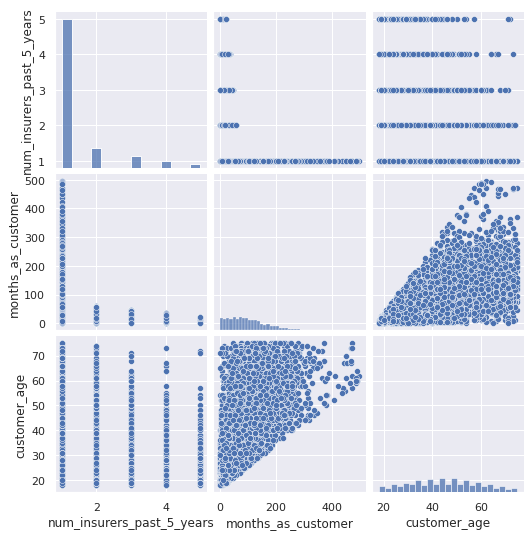

In [9]:
sns.pairplot(
    data=df_customers, vars=["num_insurers_past_5_years", "months_as_customer", "customer_age"]
);

Understandably, the `months_as_customer` and `customer_age` are correlated with each other. A younger person have been driving for a smaller amount of time and therefore have a smaller potential for how long they might have been a customer.

We can also see that the `num_insurers_past_5_years` is negatively correlated with `months_as_customer`. If someone frequently jumped around to different insurers, then they probably spent less time as a customer of this insurer.

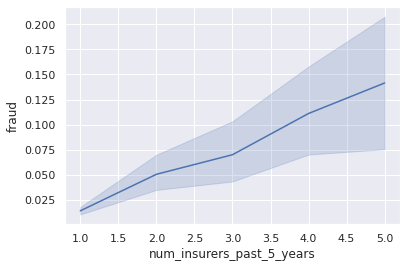

In [10]:
df_combined = df_customers.join(df_claims)
sns.lineplot(x="num_insurers_past_5_years", y="fraud", data=df_combined);

Fraud is positively correlated with having a greater number of insurers over the past 5 years. Customers who switched insurers more frequently also had more prevelance of fraud.

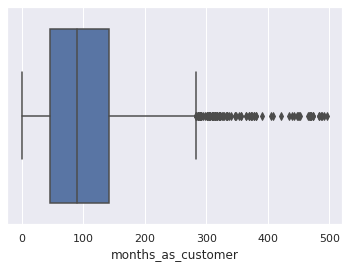

In [11]:
sns.boxplot(x=df_customers["months_as_customer"]);

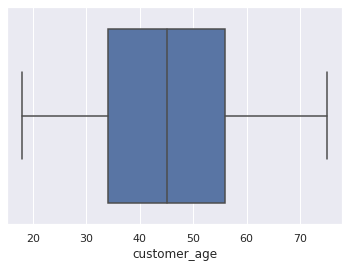

In [12]:
sns.boxplot(x=df_customers["customer_age"]);

Our customers range from 18 to 75 years old. 

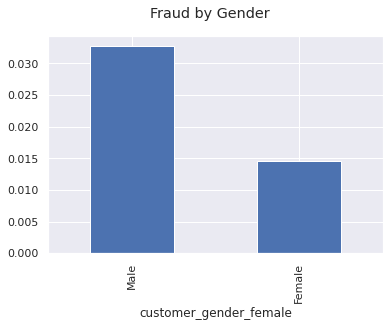

In [13]:
df_combined.groupby("customer_gender_female").mean()["fraud"].plot.bar()
plt.xticks([0, 1], ["Male", "Female"])
plt.suptitle("Fraud by Gender");

Fraudulent claims come disproportionately from male customers.

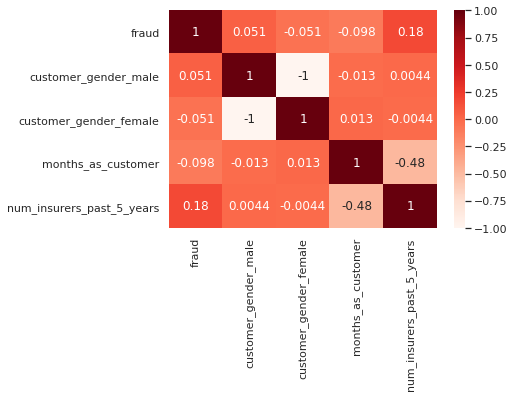

In [14]:
# Creating a correlation matrix of fraud, gender, months as customer, and number of different insurers
cols = [
    "fraud",
    "customer_gender_male",
    "customer_gender_female",
    "months_as_customer",
    "num_insurers_past_5_years",
]
corr = df_combined[cols].corr()

# plot the correlation matrix
sns.heatmap(corr, annot=True, cmap="Reds");

Fraud is correlated with having more insurers in the past 5 years, and negatively correlated with being a customer for a longer period of time. These go hand in hand and mean that long time customers are less likely to commit fraud.

### Combined DataSets

We have been looking at the indivudual datasets, now let's look at their combined view (join).

In [15]:
import pandas as pd

df_combined = pd.read_csv("./data/claims_customer.csv")

In [16]:
df_combined = df_combined.loc[:, ~df_combined.columns.str.contains("^Unnamed: 0")]
# get rid of an unwanted column
df_combined.head()

,policy_id,incident_type_theft,policy_state_ca,policy_deductable,num_witnesses,policy_state_or,incident_month,customer_gender_female,num_insurers_past_5_years,customer_gender_male,...,policy_state_id,incident_hour,vehicle_claim,fraud,incident_type_collision,policy_annual_premium,policy_state_az,policy_state_wa,collision_type_rear,collision_type_front
0,1675,0,0,750,0,0,2,0,1,0,...,0,20,12000.0,0,0,3000,1,0,0,0
1,9,0,0,750,0,0,9,0,1,1,...,0,15,18500.0,0,1,3000,0,0,0,0
2,1687,0,1,750,0,0,7,1,1,0,...,0,16,17500.0,0,1,3000,0,0,0,0
3,1687,0,1,750,0,0,7,0,1,1,...,0,16,17500.0,0,1,3000,0,0,0,0
4,1692,0,0,750,2,0,6,1,1,0,...,0,8,21500.0,0,1,2800,1,0,0,1


In [17]:
df_combined.describe()

,policy_id,incident_type_theft,policy_state_ca,policy_deductable,num_witnesses,policy_state_or,incident_month,customer_gender_female,num_insurers_past_5_years,customer_gender_male,...,policy_state_id,incident_hour,vehicle_claim,fraud,incident_type_collision,policy_annual_premium,policy_state_az,policy_state_wa,collision_type_rear,collision_type_front
count,20000.00000,20000.000000,20000.0000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2500.50000,0.048200,0.6204,751.13000,0.866100,0.070000,6.713200,0.372400,1.412200,0.576500,...,0.02730,11.786800,17426.083700,0.030000,0.857200,2925.400000,0.113600,0.121000,0.220900,0.425400
std,1443.41173,0.214194,0.4853,13.57322,1.097921,0.255153,3.654396,0.483456,0.897291,0.494125,...,0.16296,5.337918,10043.773599,0.170591,0.349878,143.516096,0.317333,0.326135,0.414864,0.494416
min,1.00000,0.000000,0.0000,750.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1000.000000,0.000000,0.000000,2150.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.75000,0.000000,0.0000,750.00000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,...,0.00000,8.000000,10474.250000,0.000000,1.000000,2900.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.50000,0.000000,1.0000,750.00000,0.000000,0.000000,7.000000,0.000000,1.000000,1.000000,...,0.00000,12.000000,15000.000000,0.000000,1.000000,3000.000000,0.000000,0.000000,0.000000,0.000000
75%,3750.25000,0.000000,1.0000,750.00000,2.000000,0.000000,10.000000,1.000000,1.000000,1.000000,...,0.00000,16.000000,22005.500000,0.000000,1.000000,3000.000000,0.000000,0.000000,0.000000,1.000000
max,5000.00000,1.000000,1.0000,1100.00000,5.000000,1.000000,12.000000,1.000000,5.000000,1.000000,...,1.00000,23.000000,51051.000000,1.000000,1.000000,3000.000000,1.000000,1.000000,1.000000,1.000000


Let's explore any unique, missing, or large percentage category in the combined dataset.

In [18]:
combined_stats = []


for col in df_combined.columns:
    combined_stats.append(
        (
            col,
            df_combined[col].nunique(),
            df_combined[col].isnull().sum() * 100 / df_combined.shape[0],
            df_combined[col].value_counts(normalize=True, dropna=False).values[0] * 100,
            df_combined[col].dtype,
        )
    )

stats_df = pd.DataFrame(
    combined_stats,
    columns=["feature", "unique_values", "percent_missing", "percent_largest_category", "datatype"],
)
stats_df.sort_values("percent_largest_category", ascending=False)

,feature,unique_values,percent_missing,percent_largest_category,datatype
3,policy_deductable,8,0.0,98.94,int64
28,authorities_contacted_ambulance,2,0.0,97.45,int64
37,policy_state_id,2,0.0,97.27,int64
35,authorities_contacted_fire,2,0.0,97.20,int64
40,fraud,2,0.0,97.00,int64
36,driver_relationship_other,2,0.0,96.06,int64
16,driver_relationship_child,2,0.0,95.49,int64
27,policy_state_nv,2,0.0,95.23,int64
1,incident_type_theft,2,0.0,95.18,int64
23,num_claims_past_year,8,0.0,93.28,int64


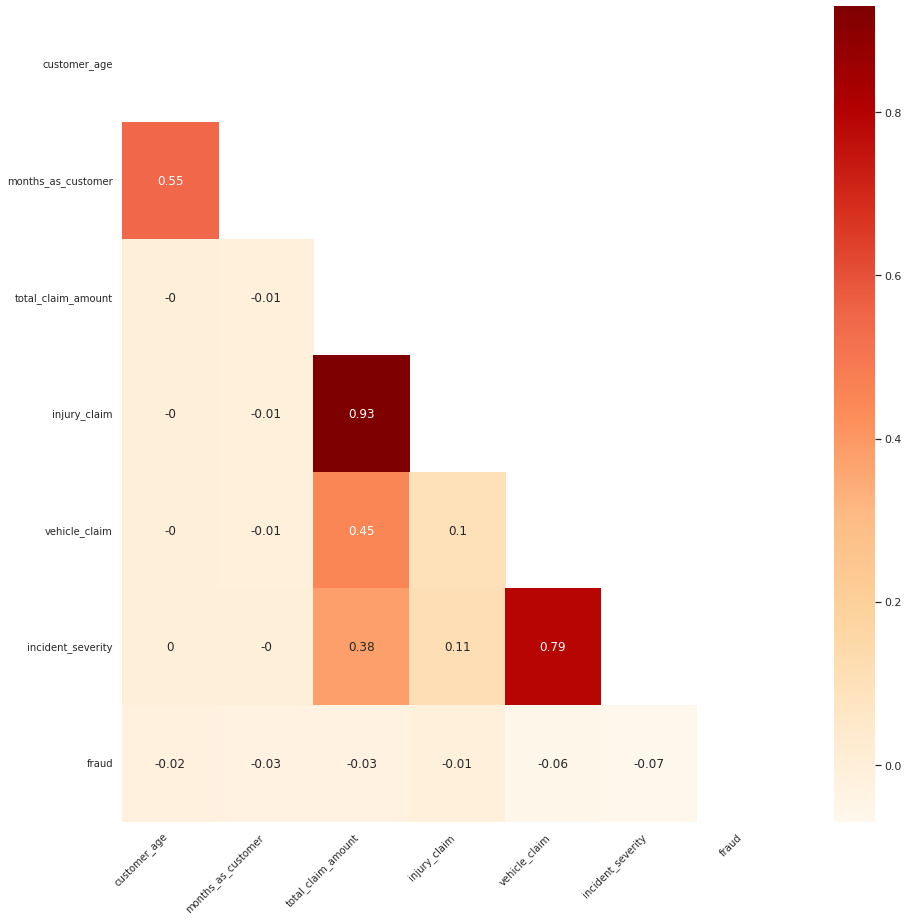

In [19]:
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("white")

corr_list = [
    "customer_age",
    "months_as_customer",
    "total_claim_amount",
    "injury_claim",
    "vehicle_claim",
    "incident_severity",
    "fraud",
]

corr_df = df_combined[corr_list]
corr = round(corr_df.corr(), 2)

fix, ax = plt.subplots(figsize=(15, 15))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True, cmap="OrRd")

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, ha="right", rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va="center", rotation=0)

plt.show()